In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-02 / Aki Taanila


# Seaborn grafiikkaa

**Matplotlib** on grafiikan peruskirjasto. **Seaborn** on rakennettu matplotlibin varaan. Kaikki seaborn-kaaviot tehdään suoraan datasta ilman itse laskettuja yhteenvetotaulukoita (frekvenssitaulukot, ristiintaulukoinnit, tunnusluvut jne.). Seaborn hoitaa taustalla yhteevetojen laskennan.

Seabornilla tehtyjä kaavioita voin jälkikäteen muotoilla matplotlibin toiminnoilla. Useimmin tarvittuihin muotoiluihin löytyy kätevät oikopolut **matplotlib.pyplot**-paketista. Joihinkin harvemmin käytettyihin muotoiluhin täytyy viitata suoraan kaavio-olion kautta.

## Ohjelmakirjastojen tuonnit ja muut alkuvalmistelut

Grafiikan tyylimäärittelyssä voin käyttää 'whitegrid' sijasta 'white', 'dark', 'darkgrid' tai 'ticks'. Tyylimäärittelyn voi jättää myös kokonaan tekemättä.

**PercentFormatter** ja **MultipleLocator** eivät ole välttämättömiä, mutta niiden avulla voin viimeistellä kaavion arvoakselin.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from matplotlib.ticker import PercentFormatter, MultipleLocator
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

## Datan avaaminen ja muuttujien määrittely

Kategoristen muuttujien tekstimuotoiset arvot voin täydentää dataan **replace**-funktiolla, esimerkiksi `df['sukup'] = df['sukup'].replace({1:'Mies', 2:'Nainen'})`. Tästä seuraa usein ylimääräistä vaivaa tulosten muotoilussa, koska tekstimuotoiset arvot asettuvat tulostaulukoissa aakkosjärjestykseen, joka useinkaan ei ole haluttu järjestys. Sen vuoksi tässä muistiossa täydennän tekstimuotoiset arvot datan sijasta kaavioihin paitsi hajontakaavioiden kohdalla.

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
dikotomiset = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

# Datassa on useita samalla asteikolla mitattuja muuttujia
# Toiston välttämiseksi tallennetaan asteikko listana
tyytyvaisyys = ['Erittäin tyytymätön', 'Tyytymätön','Ei tyytymätön eikä tyytyväinen',
                'Tyytyväinen', 'Erittäin tyytyväinen']

# Tekstimuotoiset arvot sanakirjana
listat = {'sukup':['Mies', 'Nainen'],
         'perhe':['Perheetön', 'Perheellinen'],
         'koulutus':['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu'],
         'johto':tyytyvaisyys,
         'työtov':tyytyvaisyys,
         'työymp':tyytyvaisyys,
         'palkkat':tyytyvaisyys,
         'työteht':tyytyvaisyys}

## Kategorisen muuttujan frekvenssijakauma - countplot

Katso https://seaborn.pydata.org/generated/seaborn.countplot.html

Text(0, 0.5, 'lukumäärä')

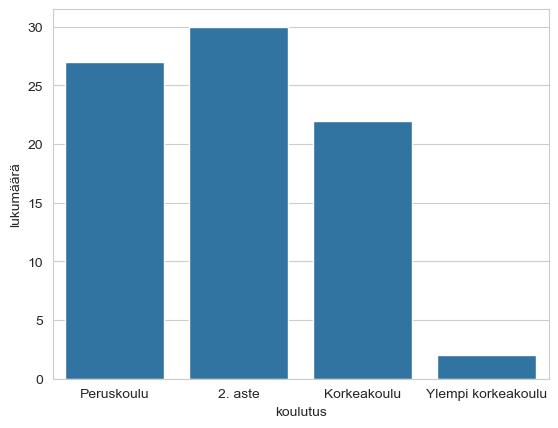

In [5]:
sns.countplot(data=df, x='koulutus')
plt.xticks(plt.xticks()[0], listat['koulutus'])
plt.ylabel('lukumäärä')

Seuraavassa prosenttikaavio ja hieman ylimääräisiä muotoiluja.

Lukumäärät voin vaihtaa prosenteiksi `stat='percent'`-parametrilla.

Seaborn käyttää matplotlibin oletusväripalettia, mutta saturoi värejä. Parametrilla `saturation=1` saan matplotlibin oletusvärit.

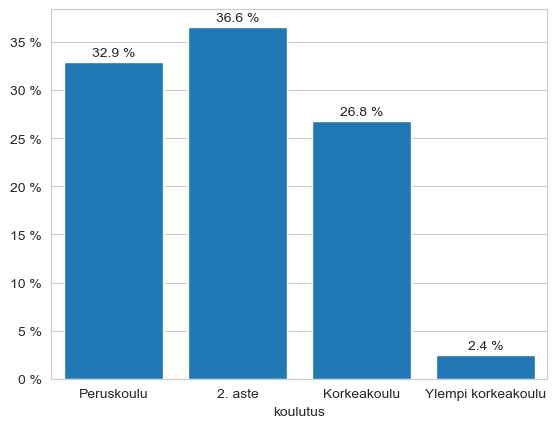

In [6]:
ax = sns.countplot(data=df, x='koulutus', stat='percent', saturation=1)
plt.xticks(plt.xticks()[0], listat['koulutus'])
plt.ylabel('')
ax.yaxis.set_major_formatter(ticks)

for container in ax.containers:
    ax.bar_label(container, fmt='{:.1f} %', padding=2)

Voin luoda kuvion, joka sisältää useasta muuttujasta tehdyt kaaviot. Tähän käytän **subplots**-funktiota.

Huomaa **enumerate**, jonka avulla voin käydä **for**-silmukalla läpi sekä muuttujalistan järjestysnumerot että muuttujat.

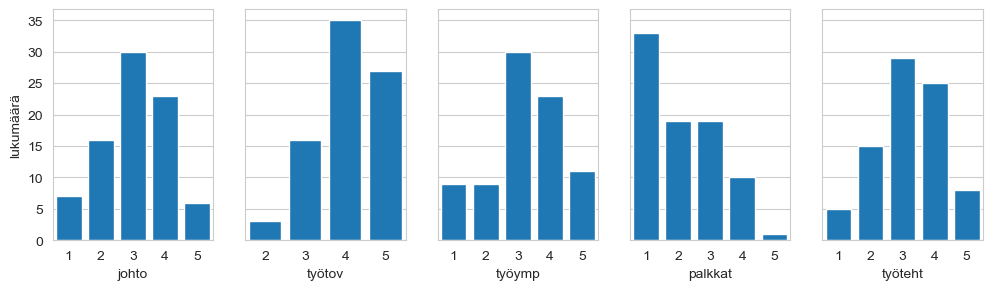

In [7]:
fig, axs = plt.subplots(ncols=5, sharey=True, figsize=(12, 3))
for i, muuttuja in enumerate(df.loc[:, 'johto':'työteht']):
    sns.countplot(data=df, x=muuttuja, ax=axs[i], saturation=1)
axs[0].set_ylabel('lukumäärä')
axs[1].set_xticks([0, 1, 2, 3], [2, 3, 4, 5])

## Ristiintaulukointi grafiikkana - countplot, catplot

Jos oletusvärit kelpaavat, niin et tarvitse **palette**- tai **saturation**-parametreja. Värimäärittelyt **'C0'** ja **'C1'** viittaavat matplotlibin oletusväripaletin ensimmäiseen ja toiseen väriin. Seaborn saturoi värejä tunkkaisempaan suuntaan, mutta `saturation=1` vaihtaa ne matplotlibin alkuperäisiksi oletusväreiksi.

Värejä voit määrittää myös värien nimillä tai koodeilla. Katso https://matplotlib.org/3.1.0/gallery/color/named_colors.html ja https://www.w3schools.com/colors/colors_picker.asp

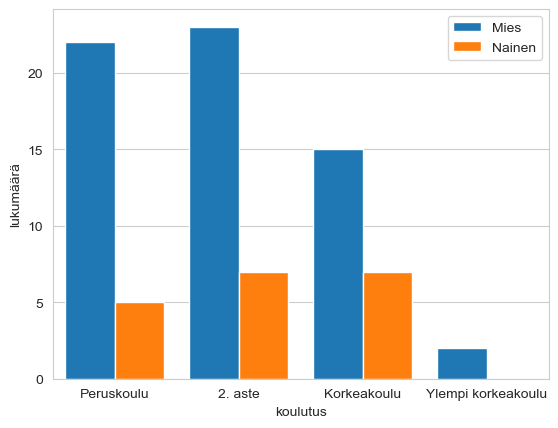

In [8]:
sns.countplot(data=df, x='koulutus', hue='sukup', palette=['C0', 'C1'], saturation=1)
plt.xticks(plt.xticks()[0], listat['koulutus'])
plt.ylabel('lukumäärä')
plt.legend(listat['sukup'])

Seaborn mahdollistaa yhdistelmäkuviot, joissa tehdään erilliset kaaviot kategorisen taustamuuttujan määräämissä ryhmissä. Taustamuuttujan voin antaa joko **col**- tai **row**-parametrin arvona.

Katso https://seaborn.pydata.org/generated/seaborn.catplot.html ja https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

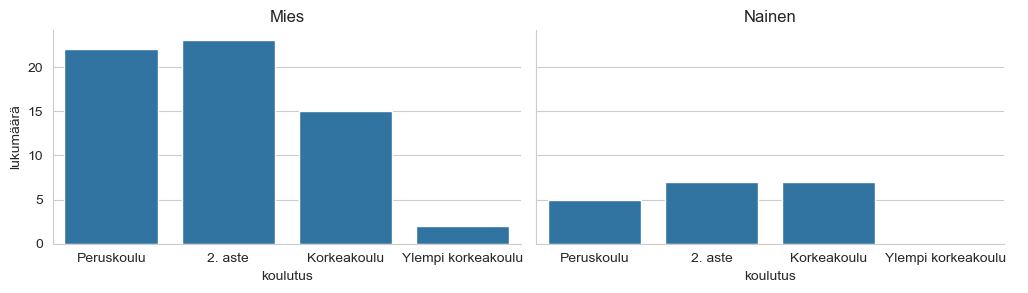

In [9]:
g = sns.catplot(data=df, x='koulutus', col='sukup', kind='count', height=3, aspect=1.7)
g.set_xticklabels(listat['koulutus'])
g.set_ylabels('lukumäärä')
for ax, title in zip(g.axes.flatten(), listat['sukup']):
    ax.set_title(title)

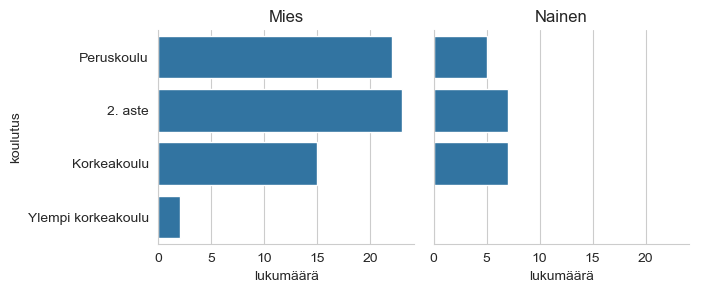

In [10]:
g = sns.catplot(data=df, y='koulutus', col='sukup', kind='count', height=3)
g.set_yticklabels(listat['koulutus'])
g.set_xlabels('lukumäärä')
for ax, title in zip(g.axes.flatten(), listat['sukup']):
    ax.set_title(title)

### Prosenttien esittäminen - matplotlib stacked barh

En suosittele prosenttien esittämistä vierekkäisinä pylväinä, koska kaavion tulkinta on vaikeaa (prosenttia mistä?). Sen sijaan prosenttien esittämiseen sopii pinotut 100 % pylväät. Tätä varten ristiintaulukointi täytyy ensin laskea taulukkona, josta kaavion voi laatia matplotlibiä käyttäen.

Väripaletiksi (**cmap**-parametri) kannattaa vaihtaa **sequential**-tyyppinen paletti. Katso https://matplotlib.org/stable/users/explain/colors/colormaps.html

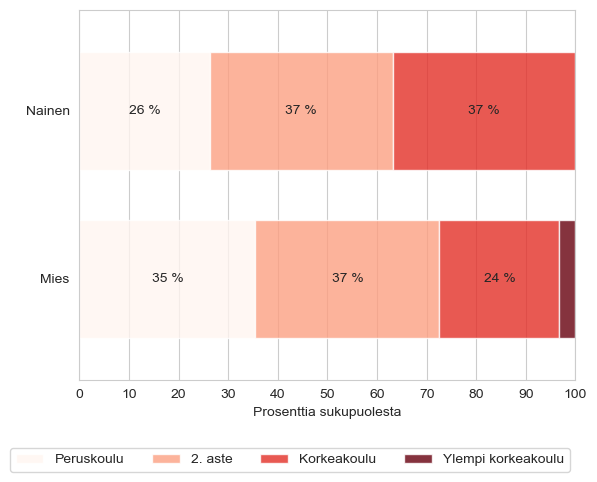

In [11]:
ristiintaulukointi = pd.crosstab(df['sukup'], df['koulutus'], normalize='index') * 100
ristiintaulukointi.index = listat['sukup']
ristiintaulukointi.columns = listat['koulutus']

ax = ristiintaulukointi.plot(kind='barh', stacked=True, width=0.7, cmap='Reds', alpha=0.8)
plt.xlabel('Prosenttia sukupuolesta')
plt.grid(axis='y')
plt.legend(loc=(-0.14, -0.25), ncol=4)
plt.xlim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(10))

for bar in ax.patches:
    left, bottom, width, height = bar.get_bbox().bounds
    if width > 5:
        label = '{:.0f} %'.format(width)
        plt.text(x=left+width/2, y=bottom+height/2, s=label, ha='center', va='center')

## Dikotomiset muuttujat - barplot

Jos dikotomisen muuttuujan arvoja on merkitty ykkösillä (1), niin yhteenvedon saa summaamalla.

Pylväät voin järjestää suuruusjärjestykseen ottamalla kuvattavien muuttujien listan suuruusjärjestykseen järjestetystä taulukosta.

Text(0, 0.5, 'käyttäjien lukumäärä')

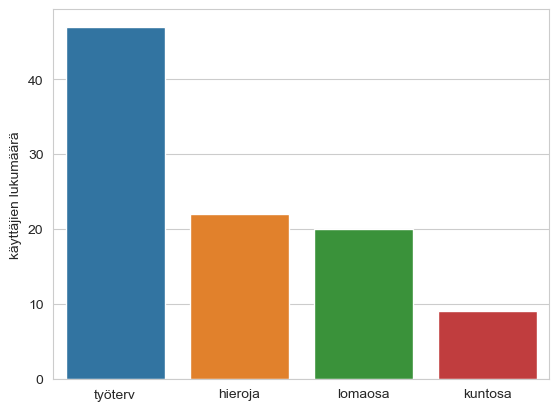

In [12]:
list = df[dikotomiset].sum().sort_values(ascending=False).index
sns.barplot(data=df[list], estimator=sum, errorbar=None)
plt.ylabel('käyttäjien lukumäärä')

Text(0, 0.5, 'lukumäärä')

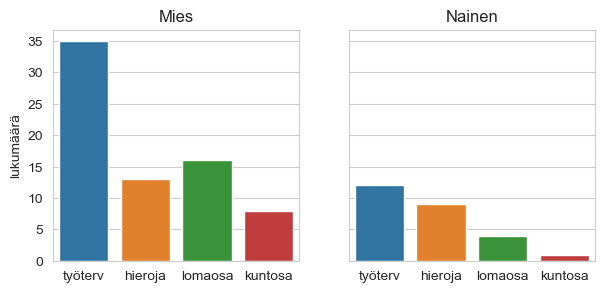

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 3))
for i in range(2):
    sns.barplot(data=df[list][df['sukup']==i+1], ax=axs[i], estimator=sum, errorbar=None)
    axs[i].set_title(listat['sukup'][i])
axs[0].set_ylabel('lukumäärä')

## Määrällisen muuttujan luokiteltu jakauma - histplot, displot

Luokittelun toteuttamiseen on kolme vaihtoehtoa
* ilman **bins**-parametria seaborn määrittelee luokat oman algoritminsa mukaan
* **bins**-parametrille voi antaa yksittäisen lukuarvon, joka määrittää luokkien lukumäärän
* **bins**-parametrille annetaan luokkarajat listana (rajat tulkitaan alarajoiksi, jotka sisältyvät luokkaan; viimeisessä luokassa myös yläraja sisältyy luokkaan).

([<matplotlib.axis.XTick at 0x222024fb610>,
 [Text(2000, 0, '2000'),
  Text(2500, 0, '2500'),
  Text(3000, 0, '3000'),
  Text(4000, 0, '4000'),
  Text(7000, 0, '7000')])

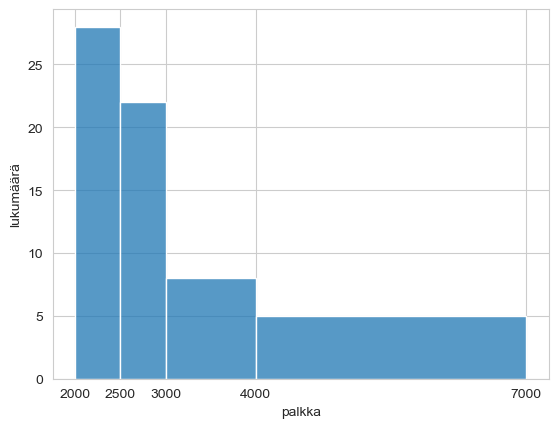

In [14]:
bins = [2000, 2500, 3000, 4000, 7000]
sns.histplot(data=df['palkka'], bins=bins)
plt.ylabel('lukumäärä')
plt.xticks(bins)

Seaborn mahdollistaa yhdistelmäkaaviot, joissa tehdään erilliset kaaviot kategorisen taustamuuttujan määräämissä ryhmissä. Taustamuuttujan voi antaa joko **col**- tai **row**-parametrin arvona.

Katso https://seaborn.pydata.org/generated/seaborn.displot.html ja https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

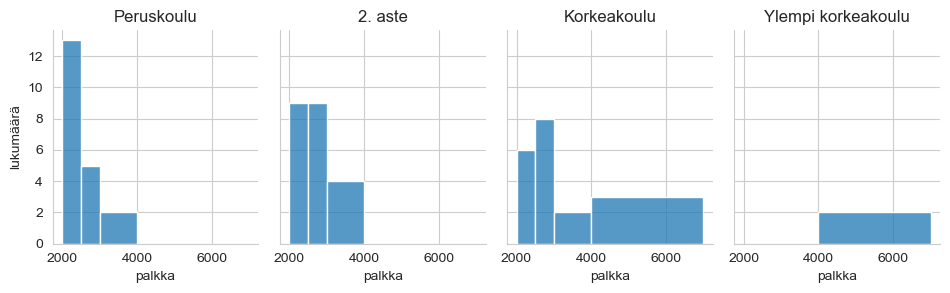

In [15]:
g = sns.displot(data=df, x='palkka', col='koulutus', kind='hist', bins=bins, height=3, aspect=0.8)
g.set_ylabels('lukumäärä')
for ax, title in zip(g.axes.flatten(), listat['koulutus']):
    ax.set_title(title)

## Määrällisen muuttujan tilastolliset tunnusluvut - boxplot

Katso https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: ylabel='palkka'>

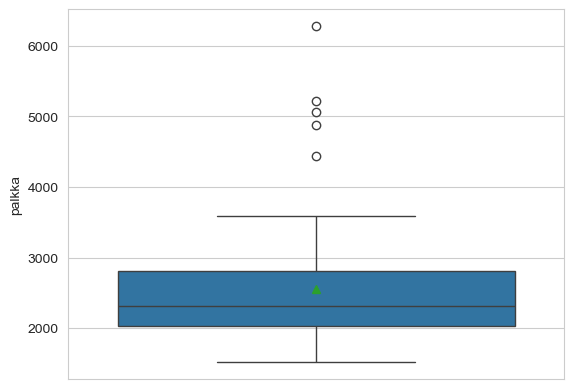

In [16]:
sns.boxplot(data=df, y='palkka', showmeans=True)

### Kategorisen muuttujan määräämissä ryhmissä

([<matplotlib.axis.XTick at 0x22202ae20d0>,
 [Text(0, 0, 'Peruskoulu'),
  Text(1, 0, '2. aste'),
  Text(2, 0, 'Korkeakoulu'),
  Text(3, 0, 'Ylempi korkeakoulu')])

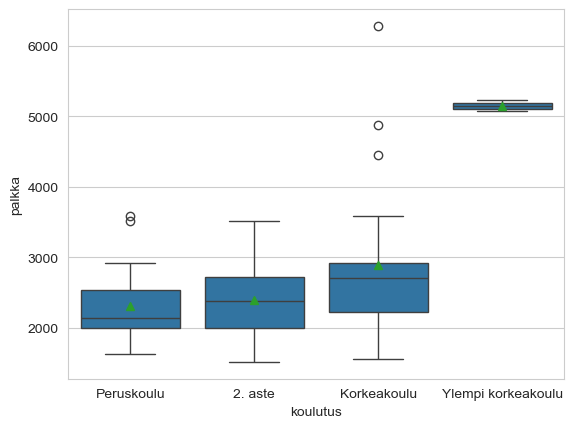

In [17]:
sns.boxplot(data=df, x='koulutus', y='palkka', showmeans=True)
plt.xticks(plt.xticks()[0], listat['koulutus'])

## Kahden määrällisen muuttujan välinen riippuvuus - scatterplot, jointplot, lmplot, pairplot

Seabornin hajontakaavioiden selitteen muotoilu on puutteellisesti dokumentoitu ja sisältää ainakin joissain versioissa myös bugin. Jos selitteeseen halutut tekstimuotoiset arvot ovat alkuperäisessä datassa, niin muotoiluja ei tarvitse koodissa tehdä.

In [18]:
# Lisätään sukupuolen tekstimuotoiset arvot dataan
df['sukupuoli'] = df['sukup'].replace({1:'Mies', 2:'Nainen'})

Katso https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='ikä', ylabel='palkka'>

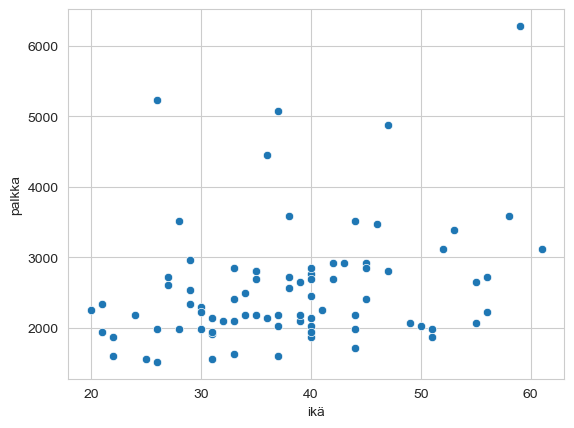

In [19]:
sns.scatterplot(data=df, x='ikä', y='palkka')

<Axes: xlabel='ikä', ylabel='palkka'>

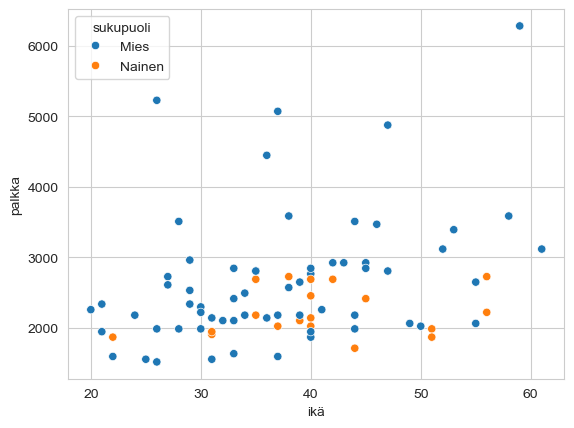

In [20]:
sns.scatterplot(data=df, x='ikä', y='palkka', hue='sukupuoli')

# Jos tekstimuotoiset arvot eivät ole datassa, niin seuraava tarvitaan:
#handles, labels  =  plt.gca().get_legend_handles_labels()
#plt.legend(handles, listat['sukup'])

Katso https://seaborn.pydata.org/generated/seaborn.jointplot.html

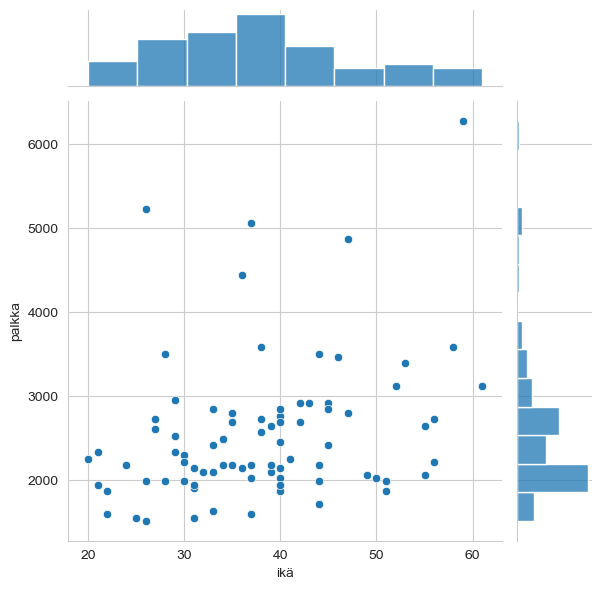

In [21]:
sns.jointplot(data=df, x='ikä', y='palkka')

Katso https://seaborn.pydata.org/generated/seaborn.lmplot.html

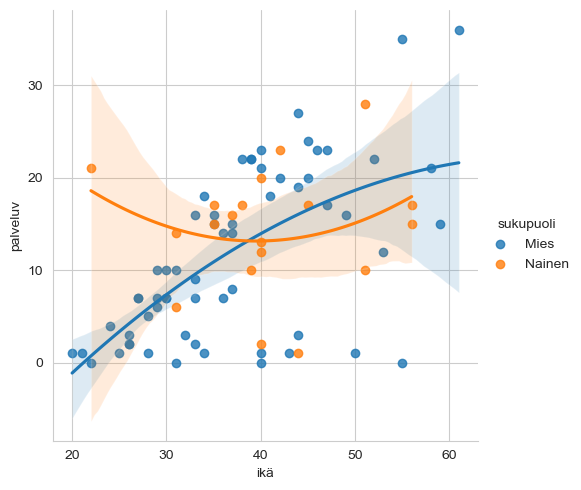

In [22]:
sns.lmplot(data=df, x='ikä', y='palveluv', hue='sukupuoli', order=2)

# Jos tekstimuotoiset arvot eivät ole datassa, niin seuraava tarvitaan:
#handles, labels  =  plt.gca().get_legend_handles_labels()
#plt.legend(handles, listat['sukup'])

Katso https://seaborn.pydata.org/generated/seaborn.pairplot.html

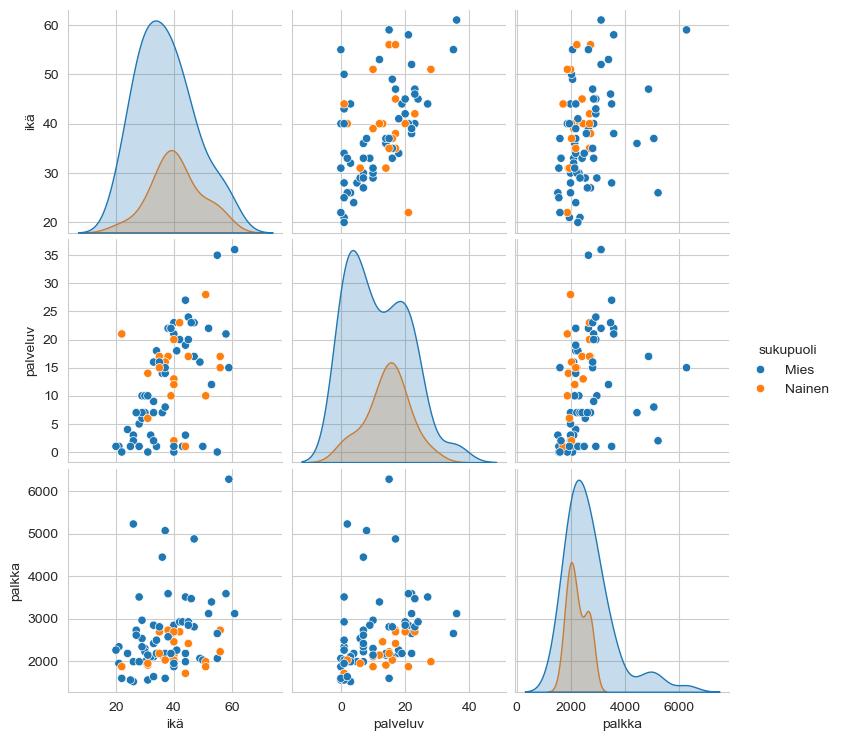

In [23]:
g = sns.pairplot(data=df, vars=['ikä', 'palveluv', 'palkka'], hue='sukupuoli')

# Jos tekstimuotoiset arvot eivät ole datassa, niin seuraava tarvitaan:
#sns.move_legend(g, loc='center right', bbox_to_anchor=(1.05, .5), labels=listat['sukup'], title='Sukupuoli')